In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import pandas as pd
from pandas.core.common import flatten
import scipy
import time
from ripser import ripser
import tadasets
from persim import plot_diagrams
# from ggplot import *


Bad key "text.kerning_factor" on line 4 in
/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# ripser_individuals

This notebook looks at the points furthest from the diagonal in the rips complex, takes the individuals which make them up, collects them by cluster, and compares the PC diagrams labelled by either in / not in cluster.

## Manhattan distance matrix

In [2]:
D_Full_Man = np.load('/home/harryem/data/HimalGen/D_Full_Man.npy')
D_Full_Man = scipy.spatial.distance.squareform(D_Full_Man)

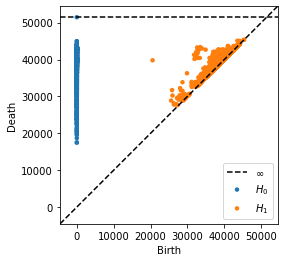

Time: 99.7 seconds


In [3]:
start = time.time()
result = ripser(D_Full_Man, coeff=2, maxdim=1, do_cocycles=True, distance_matrix=True)
diagrams = result['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

# GT matrix PCs

/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


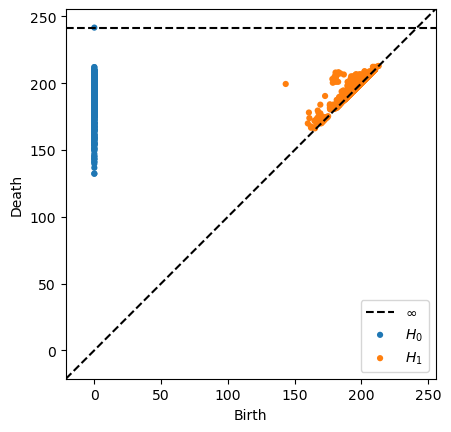

Time: 114.0 seconds


In [4]:
# PCA
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)
labels_pop = pd.read_csv('~/../projects/HimalGenAsia/HimalGen.popinfo.csv',sep=',')

start = time.time()
result = ripser(gt_matrix_PCs, coeff=2, maxdim=1, do_cocycles=True)
diagrams = result['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

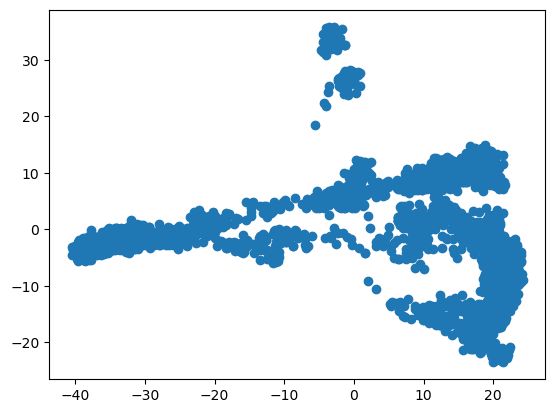

In [5]:
# gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

plt.scatter(gt_matrix_PCs[:,0], gt_matrix_PCs[:,1])
plt.show()

In [6]:
dgm1 = diagrams[1]
ordered_cocycles = np.argsort(dgm1[:, 1] - dgm1[:, 0])[::-1]
# idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
cocycle_number = 0
idx=ordered_cocycles[cocycle_number]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

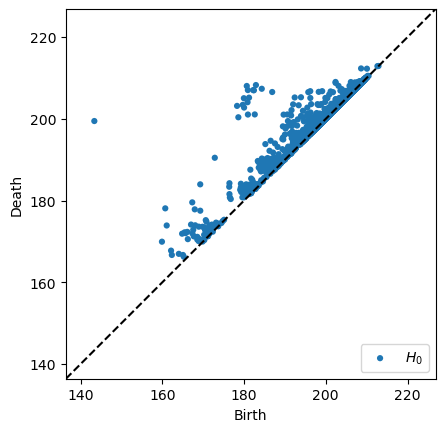

In [7]:
plot_diagrams(diagrams[1], show=True)

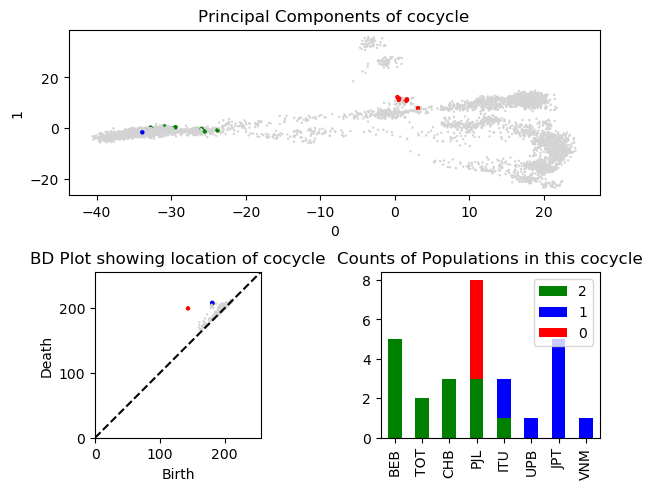

In [12]:
from ripserIndividualPlots import display_cocycle_charts

cocycle_number_list = [0,1,2]
popinfo_path = '~/../projects/HimalGenAsia/HimalGen.popinfo.csv'
colordict = {
    -1: 'lightgrey',
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink'
}

fig = display_cocycle_charts(cocycle_number_list, gt_matrix_PCs, colordict, result)

fig.show()

In [13]:
fig.savefig("gt_matrix_PCs.svg", format="svg")